In [7]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import matplotlib as mpl

In [8]:
data_pd = pd.read_excel(r'E:\WellsOfficialWork\SIOA\ValuePlot\SourceData\稳8数据.xlsx',sheet_name=r'稳进8期')

In [21]:
#  绘图-带网格
def plot_grid_line_chart(plot_pd, pic_save_path=r'E:\WellsOfficialWork\SIOA\ValuePlot'):
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    import time
    from matplotlib.dates import DateFormatter, MonthLocator
    # 解决中文显示问题
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    # 格式化日期
    fig= plt.figure(figsize=(16,8))
    data_pd = plot_pd.copy()
    data_pd['DateTime'] = pd.to_datetime(data_pd['净值日期'],format='%Y-%m-%d')
   
    # 绘图
    val_x = data_pd.DateTime
    val_y = data_pd['累计净值']
    
    # 调整样式
    ax=plt.gca()
    ax.spines['right'].set_color('none')   # 将图像右边的轴设为透明
    ax.spines['top'].set_color('none')  # 将图像上边的轴设为透明
    ax.xaxis.set_ticks_position('bottom') 
    ax.spines['bottom'].set_position(('axes',-0.1)) #移动x轴，到y=0。9

    # 调整刻度 - y轴
    ymajorLocator  = MultipleLocator(0.05)
    ax.yaxis.set_major_locator(ymajorLocator)
    
    # 设置x轴时间刻度
    formatter = DateFormatter('%Y-%m-%d')
    locate=MonthLocator(range(1, 13), bymonthday=1, interval=18) # 获取每12个月第一日数据
    ax.xaxis.set_major_locator(locate) # 设定主刻度
    ax.xaxis.set_major_formatter(formatter) # 设置时间显示格式
    
    # 标注点
    day_notate_indexs = [data_pd.DateTime[0]]
    years = np.sort(list(set(data_pd.DateTime.dt.year)))
    for year_pos in years[1:]:
        selected_pd = data_pd.loc[data_pd.DateTime < str(year_pos)]
        day_notate_indexs.append(selected_pd.DateTime[selected_pd.shape[0]-1])
    day_notate_indexs.append(data_pd.DateTime[data_pd.shape[0]-1])
    
    for day_index in range(len(day_notate_indexs)):
        index = data_pd.loc[data_pd.DateTime == day_notate_indexs[day_index]].index[0]
        ax.plot(val_x[index],val_y[index], 'o',color='blue',markersize=8,alpha=0.8)
        plt.annotate(s='%.4f'%val_y[index],xy=(day_notate_indexs[day_index],val_y[index]), 
                     xytext=(-15,20), textcoords='offset points',fontsize=15)
    
    plt.plot(val_x, val_y,linewidth=2.75) # 线宽
    plt.title(u"稳进8期",fontsize=20)
    plt.ylabel(u"基金净值",fontsize=20)
    
    ax.spines['left'].set_color('blue')
    ax.spines['bottom'].set_color('blue')
    
    # 设置字体大小
    ax.tick_params(labelsize=15)
    # y轴显示范围
    plt.ylim(0.948, 1.25)
    # 网格
    plt.grid(axis="y",color='b',alpha=0.4)
    #plt.xlim(data_pd.DateTime[0], data_pd.DateTime[data_pd.shape[0]-1])
    # x轴显示范围
    plt.xlim('2015-11-01','2019-07-30')
    plt.xticks(day_notate_indexs) #横坐标日期范围及间隔
    #bax = brokenaxes(xlims=((1,100)), hspace=.05, despine=False)
    plt.savefig(pic_save_path + r'\grid_line_chart.png')
    plt.show()

In [25]:
#  绘图-无网格
def plot_no_grid_line_chart(plot_pd, pic_save_path=r'E:\WellsOfficialWork\SIOA\ValuePlot'):
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    import time
    from matplotlib.dates import DateFormatter, MonthLocator
    # 解决中文显示问题
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    # 格式化日期
    fig= plt.figure(figsize=(16,8))
    data_pd = plot_pd.copy()
    data_pd['DateTime'] = pd.to_datetime(data_pd['净值日期'],format='%Y-%m-%d')
   
    # 绘图
    val_x = data_pd.DateTime
    val_y = data_pd['累计净值']
    
    # 调整样式
    ax=plt.gca()
    ax.spines['right'].set_color('none')   # 将图像右边的轴设为透明
    ax.spines['top'].set_color('none')  # 将图像上边的轴设为透明
    ax.xaxis.set_ticks_position('bottom') 
    ax.spines['bottom'].set_position(('axes',-0.05)) #移动x轴，到y=0。9

    # 调整刻度 - y轴
    ymajorLocator  = MultipleLocator(0.05)
    ax.yaxis.set_major_locator(ymajorLocator)
    
    # 设置x轴时间刻度
    formatter = DateFormatter('%Y-%m-%d')
    locate=MonthLocator(range(1, 13), bymonthday=1, interval=18) # 获取每12个月第一日数据
    ax.xaxis.set_major_locator(locate) # 设定主刻度
    ax.xaxis.set_major_formatter(formatter) # 设置时间显示格式
    
    # 标注点
    day_notate_indexs = [data_pd.DateTime[0]]
    years = np.sort(list(set(data_pd.DateTime.dt.year)))
    for year_pos in years[1:]:
        selected_pd = data_pd.loc[data_pd.DateTime < str(year_pos)]
        day_notate_indexs.append(selected_pd.DateTime[selected_pd.shape[0]-1])
    day_notate_indexs.append(data_pd.DateTime[data_pd.shape[0]-1])
    
    for day_index in range(len(day_notate_indexs)):
        index = data_pd.loc[data_pd.DateTime == day_notate_indexs[day_index]].index[0]
        ax.plot(val_x[index],val_y[index], 'o',color='blue',markersize=8,alpha=0.8)
        plt.annotate(s='%.4f'%val_y[index],xy=(day_notate_indexs[day_index],val_y[index]), 
                     xytext=(-15,20), textcoords='offset points',fontsize=15)
    
    plt.plot(val_x, val_y,linewidth=2.75) # 线宽
    plt.title(u"稳进8期",fontsize=20)
    plt.ylabel(u"基金净值",fontsize=20)
    
    ax.spines['left'].set_color('blue')
    ax.spines['bottom'].set_color('blue')
    
    # 设置字体大小
    ax.tick_params(labelsize=15)
    # y轴显示范围
    plt.ylim(0.948, 1.25)
    # 网格
    #plt.grid(axis="y",color='b',alpha=0.4)
    #plt.xlim(data_pd.DateTime[0], data_pd.DateTime[data_pd.shape[0]-1])
    # x轴显示范围
    plt.xlim('2015-11-01','2019-07-30')
    plt.xticks(day_notate_indexs) #横坐标日期范围及间隔
    #bax = brokenaxes(xlims=((1,100)), hspace=.05, despine=False)
    plt.savefig(pic_save_path + r'\no_grid_line_chart.png')
    plt.show()

In [26]:
#  绘图- 累计图
def plot_no_grid_accumulate_chart(plot_pd, pic_save_path=r'E:\WellsOfficialWork\SIOA\ValuePlot'):
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    import time
    import matplotlib.dates as mdate
    from matplotlib.dates import DateFormatter, MonthLocator
    # 解决中文显示问题
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    # 格式化日期
    fig= plt.figure(figsize=(16,8))
    data_pd = plot_pd.copy()
    data_pd['DateTime'] = pd.to_datetime(data_pd['净值日期'],format='%Y-%m-%d')
   
    # 绘图
    val_x = data_pd.DateTime
    val_y = data_pd['累计净值']
    
    
    # 调整样式
    ax=plt.gca()
    
    # 调整刻度 - y轴
    ymajorLocator  = MultipleLocator(0.05)
    ax.yaxis.set_major_locator(ymajorLocator)
    
    # 设置x轴时间刻度
    formatter = DateFormatter('%Y-%m-%d')
    locate=MonthLocator(range(1, 13), bymonthday=1, interval=18) # 获取每12个月第一日数据
    ax.xaxis.set_major_locator(locate) # 设定主刻度
    ax.xaxis.set_major_formatter(formatter) # 设置时间显示格式
    
    # 标注点
    day_notate_indexs = [data_pd.DateTime[0]]
    years = np.sort(list(set(data_pd.DateTime.dt.year)))
    for year_pos in years[1:]:
        selected_pd = data_pd.loc[data_pd.DateTime < str(year_pos)]
        day_notate_indexs.append(selected_pd.DateTime[selected_pd.shape[0]-1])
    day_notate_indexs.append(data_pd.DateTime[data_pd.shape[0]-1])
    for day_index in range(len(day_notate_indexs)):
        index = data_pd.loc[data_pd.DateTime == day_notate_indexs[day_index]].index[0]
        ax.plot(val_x[index],val_y[index], 'o',color='blue',markersize=8,alpha=0.8)
        plt.annotate(s='%.4f'%val_y[index],xy=(day_notate_indexs[day_index],val_y[index]), 
                     xytext=(-15,20), textcoords='offset points',fontsize=15)
    
    plt.plot(val_x, val_y,linewidth=2.75) # 线宽
    plt.title(u"稳进8期",fontsize=20)# 稳进8期
    plt.ylabel(u"基金净值",fontsize=20) # 基金净值
    
    ax.spines['left'].set_color('blue')
    ax.spines['bottom'].set_color('blue')
    
    # 设置字体大小
    ax.tick_params(labelsize=15)
    # y轴显示范围
    plt.ylim(0.948, 1.25)
    
    dates = mdate.date2num([data_pd.DateTime[1], data_pd.DateTime[data_pd.shape[0]-1]])
    _, yv = np.meshgrid(np.array([1 for i in range(200)]), np.linspace(0,1,90))
    extent = [dates[0], dates[1], 0.95, max(val_y)]
    ax.imshow(yv, cmap=mpl.cm.Blues, origin='lower',alpha =1, aspect = 'auto',
          extent = extent)
     #Erase 上面 the data by filling with white
    ax.fill_between(val_x, val_y, max(val_y)+0.1, color='white')
    #ax.spines['top'].set_visible(False) 
    #ax.spines['left'].set_visible(False)
    #ax.spines['right'].set_visible(False)
    
    ax.spines['right'].set_color('none')   # 将图像右边的轴设为透明
    ax.spines['top'].set_color('none')  # 将图像上边的轴设为透明
    ax.xaxis.set_ticks_position('bottom') 
    #ax.spines['bottom'].set_position(('axes',-0.1)) #移动x轴，到y=0。9
    # 网格
    #plt.grid(axis="y",color='b',alpha=0.4)
    # x轴显示范围
    plt.xlim('2015-11-01','2019-07-30')
    plt.xticks(day_notate_indexs) #横坐标日期范围及间隔
    plt.savefig(pic_save_path + r'\accumulate_chart.png')
    plt.show()

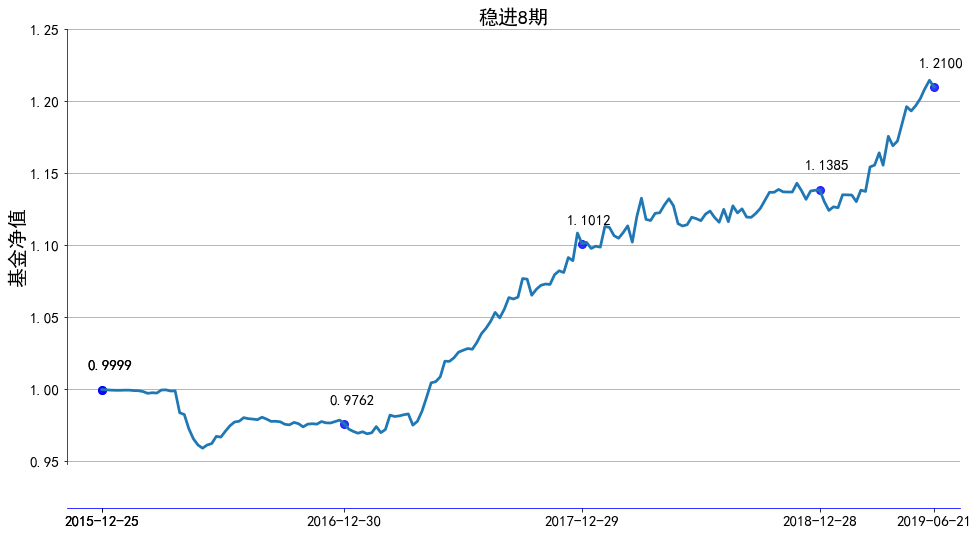

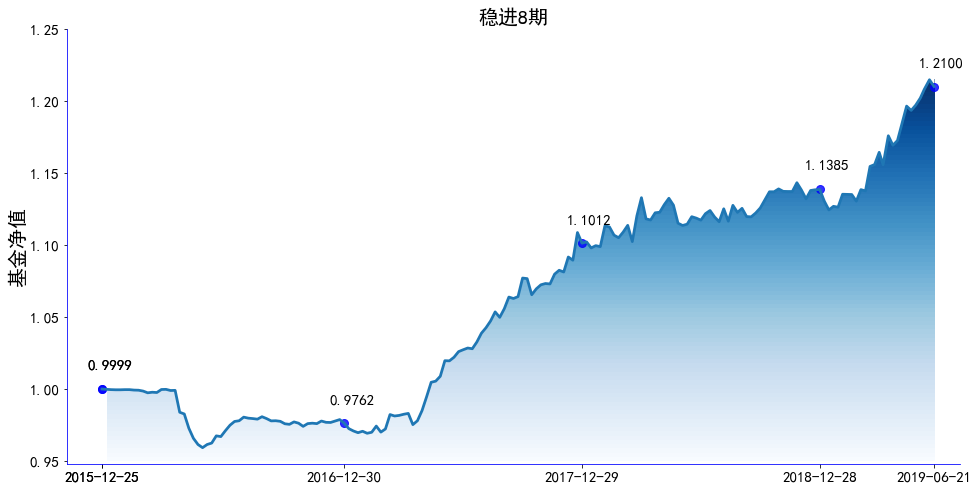

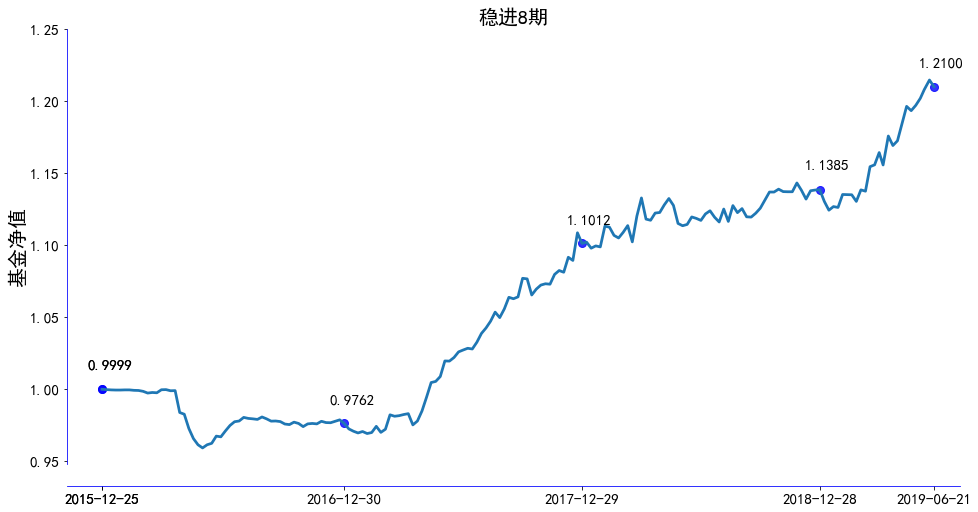

In [27]:
#res_pd = plot_line_chart(data_pd,pic_save_path=r'E:\WellsOfficialWork\SIOA\ValuePlot\PicSave')
pic_save_path=r'E:\WellsOfficialWork\SIOA\ValuePlot\PicSave'
plot_grid_line_chart(data_pd,pic_save_path=pic_save_path)
plot_no_grid_accumulate_chart(data_pd,pic_save_path=pic_save_path)
plot_no_grid_line_chart(data_pd, pic_save_path=pic_save_path)

In [ ]:
pd.to_datetime('2015-1-1')